<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr1/blob/main/Marfida%20Alexander/A_Marfida_stajirovka_profpatolog_3(norm_1b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стажировка. Профпатолог (INSPECTRUM CLINIC)
- Модели обучения для min/max нормированных данных без удаления строк с NaN в целевом столбце. Балансировка дублированием и равномерным перемешиванием.
- Целевые категории:
  - Годен
  - Не годен
  - Ограниченно годен
  - Недостаточно данных для заключения

# ЗАГРУЗКА БИБЛИОТЕК И ДАТАСЕТОВ

In [ ]:
# Подключение библиотек

# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Предварительная обработка данных
# from sklearn import preprocessing

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Связь с google-диском
from google.colab import files

# Отрисовка графиков
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Создание статистических графиков
import seaborn as sns

# Табличные данные
from fastai.tabular import *

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Очистка экрана
from IPython.display import clear_output

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
# Монтирование Goodle-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка ранее сохранённых датасетов

In [ ]:
x_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_1.npy')
x_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_1.npy')
y_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_1.npy')
y_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1.npy')

x_train_norm_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_1b.npy')
x_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_1b.npy')
y_train_norm_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_1b.npy')
y_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1b.npy')

x_train_norm_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_0.npy')
x_train_ohe_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_0.npy')
y_train_norm_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_0.npy')
y_train_ohe_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_0.npy')

x_train_norm_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_0b.npy')
x_train_ohe_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_0b.npy')
y_train_norm_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_0b.npy')
y_train_ohe_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_0b.npy')

Сохранение датасетов

In [ ]:
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm.npy', x_train_norm)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe.npy', x_train_ohe)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm.npy', y_train_norm)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe.npy', y_train_ohe)

# СЛУЖЕБНЫЕ ФУНКЦИИ

Загрузка датасетов

In [ ]:
x_train_norm_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_1b.npy')
# x_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(maredmi777)/Стажировка Профпатолог/x_train_norm_1.npy')
y_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1b.npy')
# y_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(maredmi777)/Стажировка Профпатолог/y_train_ohe_1.npy')
print(x_train_norm_1b.shape)
print(y_train_ohe_1b.shape)

(5730, 69)
(5730, 4)


## Функция графиков обучения

In [ ]:
def graphic(loss, accuracy, valloss, valaccuracy, scor, scorloss, exp, param):

  print(
    f'Входных Нейронов: {param[0]}\n',
    f'Значение Dropout: {param[1]}\n',
    f'BatchNormalization: {param[2]}\n',
    f'Средние потери: {param[3]}\n',
    f'Средняя точность на тестовой выборке: {param[4]}\n'
  )
  print('↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓')

  plt.figure(1, figsize=(20, 5))

  plt.subplot(1, 2, 1)
  plt.plot(accuracy, label='Доля верных ответов(train)')
  plt.plot(valaccuracy, label='Доля верных ответов(val)')
#  plt.scatter(19, scor/100, c='r')
  plt.title(f'Опыт№ {exp+1}. Параметры модели: {param}')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.grid(color='gray', linestyle=':')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(loss, label='train_loss')
  plt.plot(valloss, label='val_loss')
#  plt.scatter(19, scorloss, c='r')
  plt.title(f'Опыт№ {exp+1}, loss')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(color='gray',linestyle=':')
  print()
  plt.show()

## Функция создания модели

In [ ]:
def сreatModel(numN, drop, norm=False, layer2=0, layer3=0):
    # Создание последовательной модели
    model = Sequential()

    if norm:
        model.add(BatchNormalization(input_shape=(x_train.shape[1], )))
        model.add(Dense(numN, activation="relu"))
    else:
        model.add(Dense(numN, input_dim=x_train.shape[1], activation="relu"))

    if layer2 > 0:
      model.add(Dense(numN*layer2, input_dim=x_train.shape[1], activation="relu"))
    elif layer2 < 0:
      model.add(Dense(int(numN/(-layer2)), input_dim=x_train.shape[1], activation="relu"))

    if layer3 > 0:
      model.add(Dense(numN*layer2, input_dim=x_train.shape[1], activation="relu"))
    elif layer3 < 0:
      model.add(Dense(int(numN/(-layer2)), input_dim=x_train.shape[1], activation="relu"))

    model.add(Dropout(drop))
    model.add(Dense(4, activation="softmax")) #

    # Компиляция модели
    model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])
    return model

## Функция обучения и тестирования модели

In [ ]:
def training(dense_list, drop_list, norm_list, layer2=0, layer3=0):

  parameters = []
  val_accuracy= []
  val_loss_ = []
  accuracy= []
  loss_ = []
  scores = []

  for numN in dense_list:
    for norm in norm_list:
      for drop in drop_list:

        print('Параметры модели: вх.нейр.=', numN, '; откл.нейр.=', drop, '; BatchNormalization=', norm)

        # Создание последовательной модели
        model = сreatModel(numN, drop, norm=norm, layer2=layer2, layer3=layer3)

        # Обучение модели
        history = model.fit(x_train,    # обучающая выборка экземпляры класса
                  y_train,              # обучающая выборка метки класса
                  batch_size=128,       # размер батча
                  epochs=20,            # количество эпох
                  verbose=1,            # 0 - не показывать ход обучения, 1 - показывать
                  validation_data=(x_val, y_val) # выборка для валидации
                  )
        scores = model.evaluate(x_test, y_test)
        print('Точность на тестовой выборке:', scores[1] )

        parameters.append([numN, drop, norm, round(scores[0], 4), round(scores[1], 4)*100])
        val_accuracy.append(history.history['val_accuracy'])
        val_loss_.append(history.history['val_loss'])
        accuracy.append(history.history['accuracy'])
        loss_.append(history.history['loss'])

  return parameters, accuracy, loss_, val_accuracy, val_loss_

## Разделение на обучающую, валидационную и тестовую выборки

In [ ]:
X_tr_n = x_train_norm_1b.copy()
# X_tr_o = x_train_ohe_1
# Y_tr_n = y_train_norm_1
Y_tr_o = y_train_ohe_1b.copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_trn, Y_trn,
                                                    train_size=0.8,
                                                    random_state=42)#, shuffle=False) # shuffle=False - не перемешивать

In [ ]:
train_sep = int(X_tr_n.shape[0] * 0.8)
x_train, x_test, y_train, y_test =  X_tr_n[:train_sep], X_tr_n[train_sep:], Y_tr_o[:train_sep], Y_tr_o[train_sep:]
print('x_train.shape = ', x_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape', y_test.shape)
print()
val_sep = int(x_train.shape[0] * 0.8)
x_train, x_val, y_train, y_val = x_train[:val_sep], x_train[val_sep:], y_train[:val_sep], y_train[val_sep:]
print('x_train.shape = ', x_train.shape)
print('x_val.shape = ', x_val.shape)
print('y_train.shape = ', y_train.shape)
print('y_val.shape', y_val.shape)


x_train.shape =  (4584, 69)
x_test.shape =  (1146, 69)
y_train.shape =  (4584, 4)
y_test.shape (1146, 4)

x_train.shape =  (3667, 69)
x_val.shape =  (917, 69)
y_train.shape =  (3667, 4)
y_val.shape (917, 4)


## Создание модели

In [ ]:
model1 = сreatModel(64, 0.1, True)

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 69)               276       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 64)                4480      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 4)                 260       
                                                                 
Total params: 5,016
Trainable params: 4,878
Non-trainable params: 138
_________________________________________________________________


In [ ]:
model2 = сreatModel(64, 0.1, True, 4)

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 69)               276       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 64)                4480      
                                                                 
 dense_8 (Dense)             (None, 256)               16640     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 22,424
Trainable params: 22,286
Non-trainable params: 138
________________________________________________

In [ ]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

### Списки гиперпараметров

In [ ]:
dense_param = [32, 64, 128, 256]             # кол-во нейронов во входном слое
drop_param  = [0.01, 0.25]        # доля отключаемых нейронов, слой Dropout
norm_param = [False, True]             # для BatchNormalization

### Обучение модели с одним слоем

In [ ]:
par, acc, loss, val_acc, val_loss = training(dense_param, drop_param, norm_param)

Параметры модели: вх.нейр.= 32 ; откл.нейр.= 0.01 ; BatchNormalization= False
Epoch 1/20
29/29 [==============================] - 6s 15ms/step - loss: 1.2239 - accuracy: 0.5367 - val_loss: 1.0929 - val_accuracy: 0.7285
Epoch 2/20
29/29 [==============================] - 0s 7ms/step - loss: 0.9933 - accuracy: 0.7128 - val_loss: 0.9823 - val_accuracy: 0.7655
Epoch 3/20
29/29 [==============================] - 0s 7ms/step - loss: 0.8633 - accuracy: 0.7704 - val_loss: 0.8835 - val_accuracy: 0.7874
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 0.7581 - accuracy: 0.7895 - val_loss: 0.7956 - val_accuracy: 0.7939
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.6712 - accuracy: 0.8154 - val_loss: 0.7051 - val_accuracy: 0.7884
Epoch 6/20
29/29 [==============================] - 0s 6ms/step - loss: 0.5999 - accuracy: 0.8176 - val_loss: 0.6478 - val_accuracy: 0.8026
Epoch 7/20
29/29 [==============================] - 0s 7ms/step - loss: 0.5407 - 

In [ ]:
print(acc[1])
print(val_acc[1], '\n')
print(loss[1])
print(val_loss[1])

[0.47313880920410156, 0.5925824642181396, 0.6869375705718994, 0.7368420958518982, 0.7592037320137024, 0.7807471752166748, 0.7952004075050354, 0.8061085343360901, 0.8221979737281799, 0.8374693393707275, 0.8486500978469849, 0.8530133366584778, 0.8658303618431091, 0.8715571165084839, 0.8756476640701294, 0.8862830400466919, 0.8933733105659485, 0.8931006193161011, 0.9023725390434265, 0.905644953250885]
[0.520174503326416, 0.6979280114173889, 0.727371871471405, 0.7557252049446106, 0.7720828652381897, 0.7546346783638, 0.7720828652381897, 0.7764449119567871, 0.8189749121665955, 0.8211559653282166, 0.8320610523223877, 0.8364230990409851, 0.8396946787834167, 0.8429661989212036, 0.8440567255020142, 0.8451471924781799, 0.8593238592147827, 0.8625954389572144, 0.8604143857955933, 0.8636859059333801] 

[1.228007197380066, 1.0748051404953003, 0.9673845767974854, 0.8847944736480713, 0.802882194519043, 0.7318568825721741, 0.6745457053184509, 0.6190348267555237, 0.577620804309845, 0.5365564823150635, 0.4

In [ ]:
par

[[32, 0.01, False, 0.3377, 89.35],
 [32, 0.25, False, 0.3437, 88.05],
 [32, 0.01, True, 0.321, 89.7],
 [32, 0.25, True, 0.2984, 90.49000000000001],
 [64, 0.01, False, 0.3279, 89.7],
 [64, 0.25, False, 0.2964, 90.31],
 [64, 0.01, True, 0.3039, 89.97],
 [64, 0.25, True, 0.2989, 90.75],
 [128, 0.01, False, 0.3077, 89.79],
 [128, 0.25, False, 0.2985, 89.97],
 [128, 0.01, True, 0.2881, 90.14],
 [128, 0.25, True, 0.2916, 90.4],
 [256, 0.01, False, 0.316, 89.09],
 [256, 0.25, False, 0.3032, 89.27000000000001],
 [256, 0.01, True, 0.3025, 90.49000000000001],
 [256, 0.25, True, 0.2995, 90.75]]

#### Сводные результаты обучения

In [ ]:
col = [' Число Нейронов ', ' Значение Dropout ',' BatchNormalization? ',' Loss тестовой ', ' Точность тестовой ']
df = pd.DataFrame(par, columns = col, index= np.arange(1, len(par)+1))
df

Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.3377                89.35  
2            0.3437                88.05  
3            0.3210                89.70  
4            0.2984                90.49  
5            0.3279                89.70  
6            0.2964                90.31  
7            0.3039                89.97  
8            0.2989                90.75  
9            0.3077                89.79  
10           0.2985                89.97  
11           0.2881                90.14  
12           0.2916                90.40  
13           0.3160                89.09  
14           0.3032                89.27  
15           0.3025                90.49  
16           0.2995                90.75

#### Графики обучения

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.3377
 Средняя точность на тестовой выборке: 89.35

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



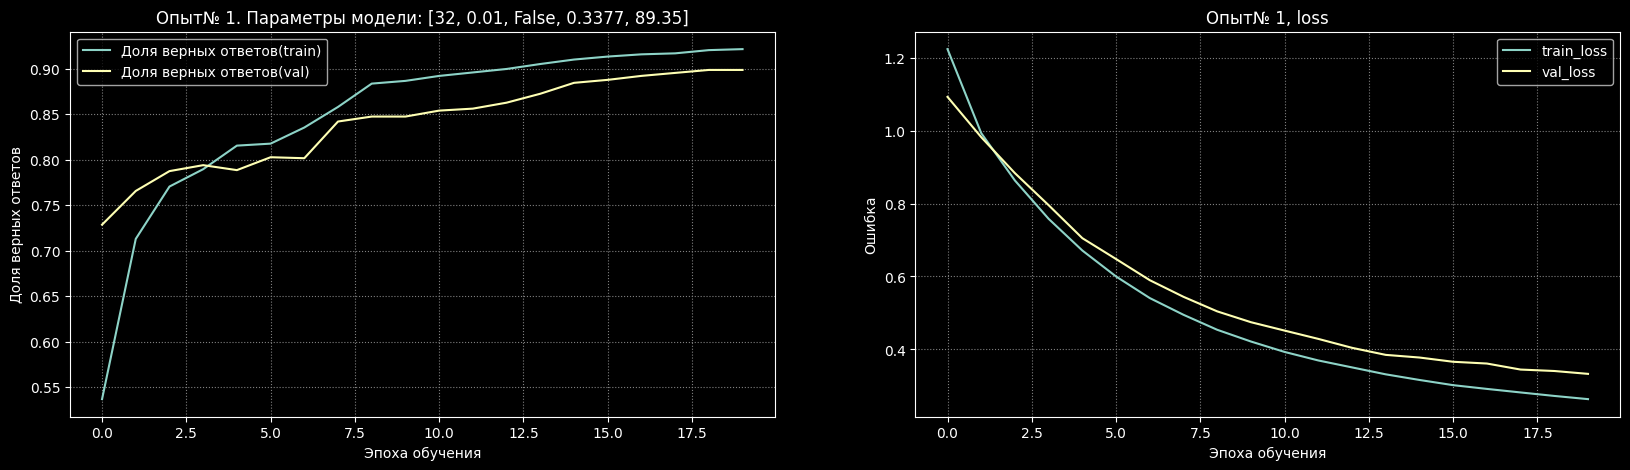

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.3437
 Средняя точность на тестовой выборке: 88.05

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



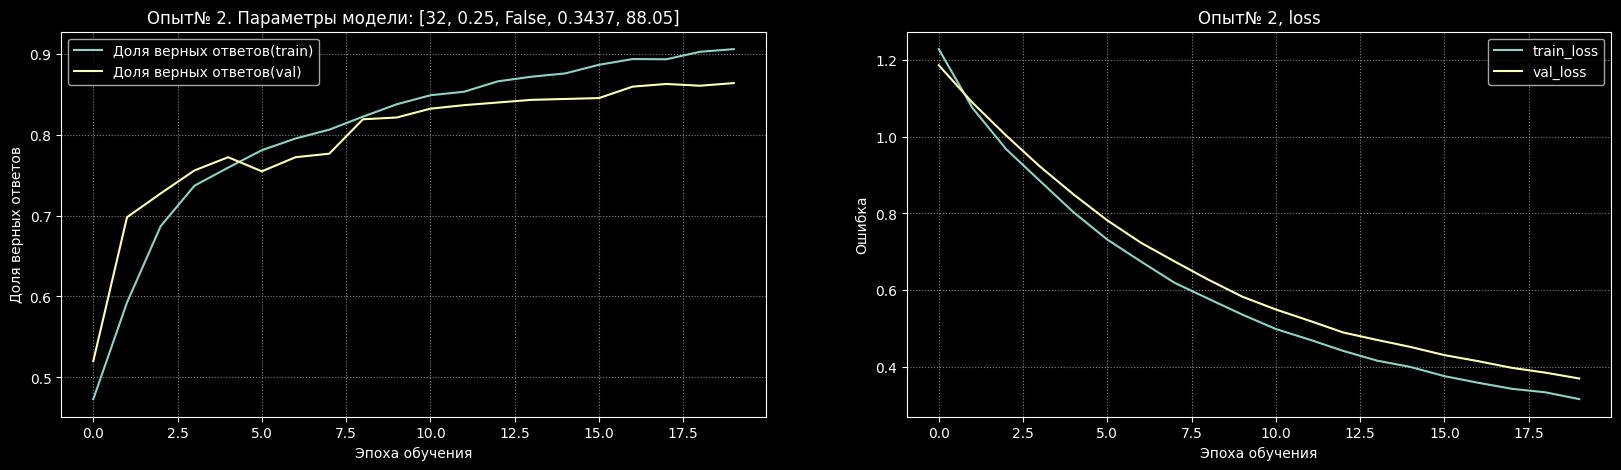

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.321
 Средняя точность на тестовой выборке: 89.7

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



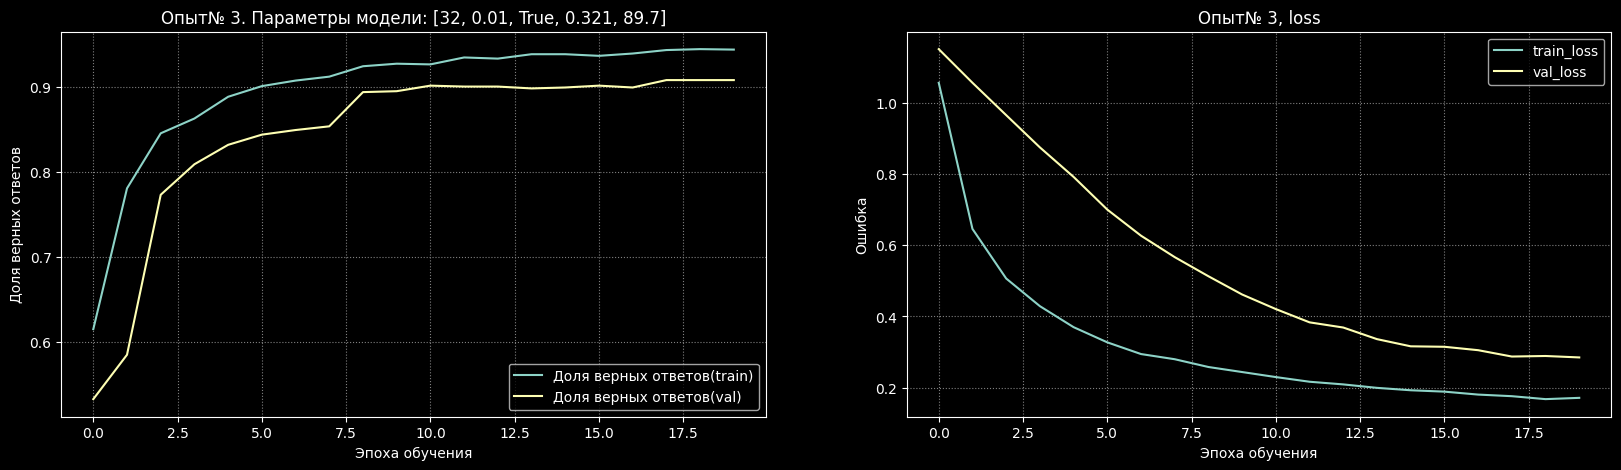

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2984
 Средняя точность на тестовой выборке: 90.49000000000001

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



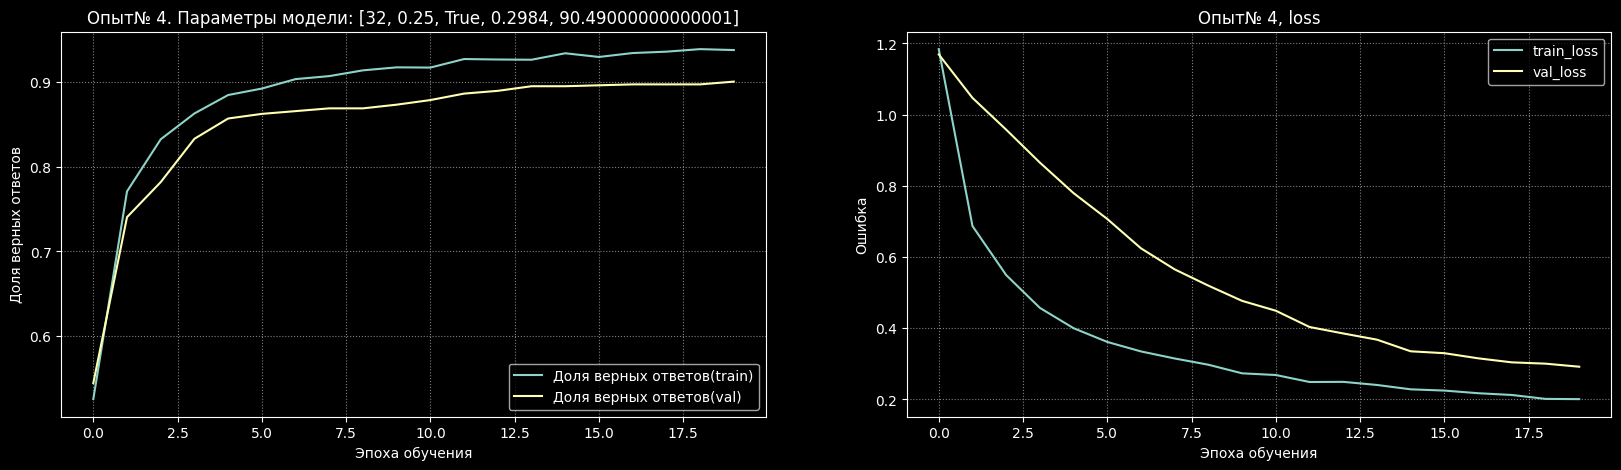

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.3279
 Средняя точность на тестовой выборке: 89.7

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



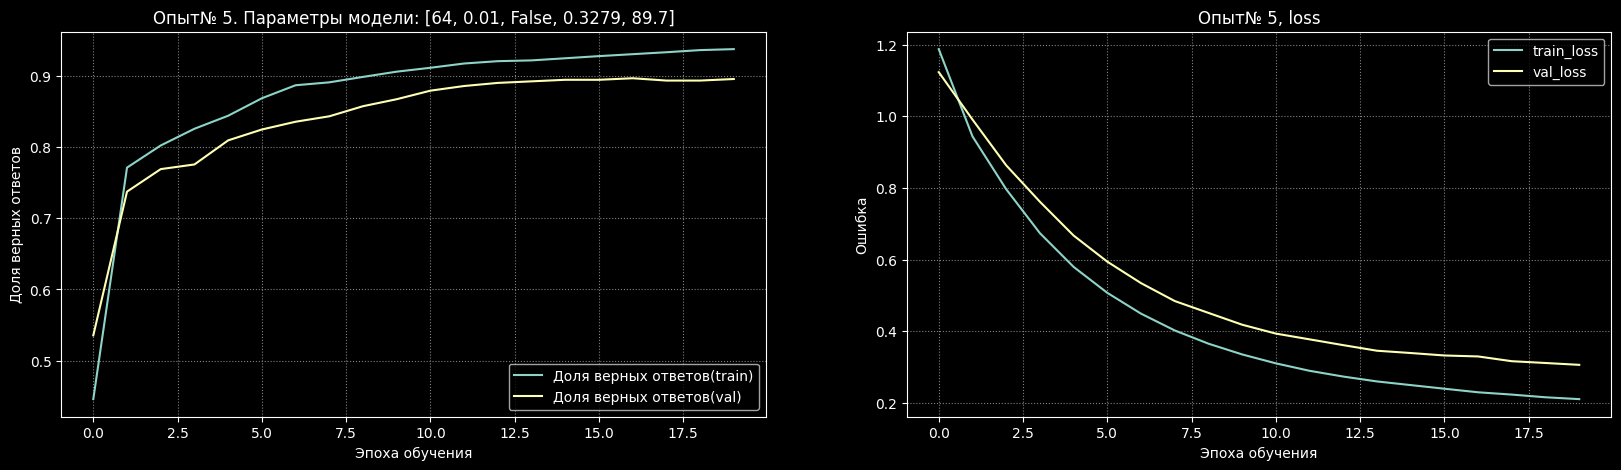

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2964
 Средняя точность на тестовой выборке: 90.31

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



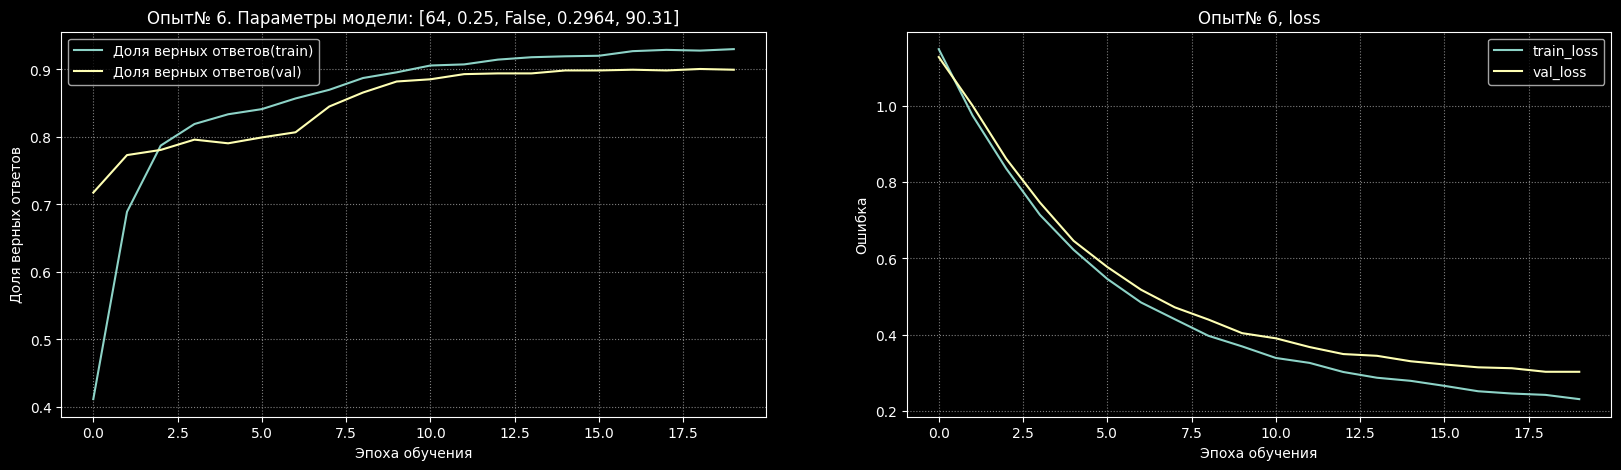

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.3039
 Средняя точность на тестовой выборке: 89.97

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



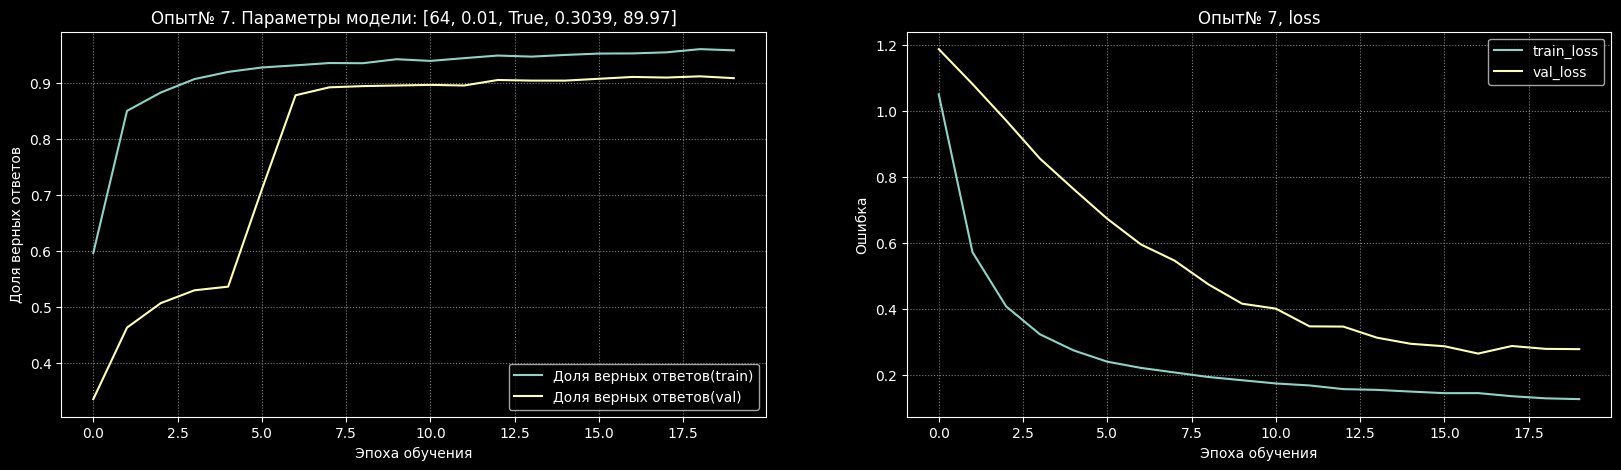

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2989
 Средняя точность на тестовой выборке: 90.75

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



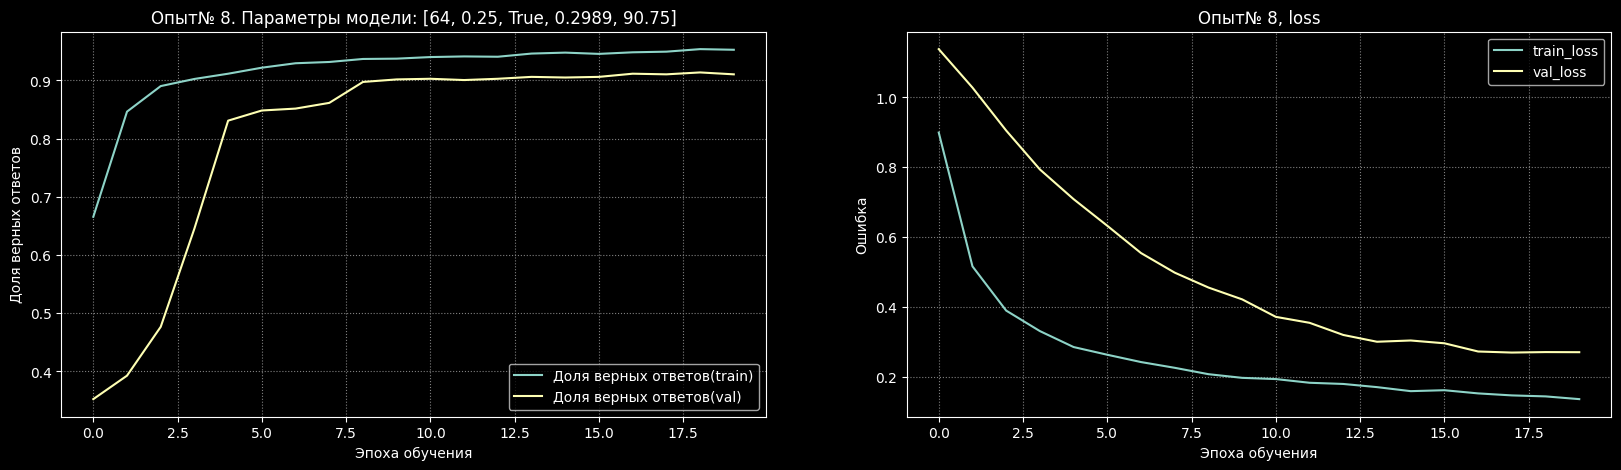

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.3077
 Средняя точность на тестовой выборке: 89.79

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



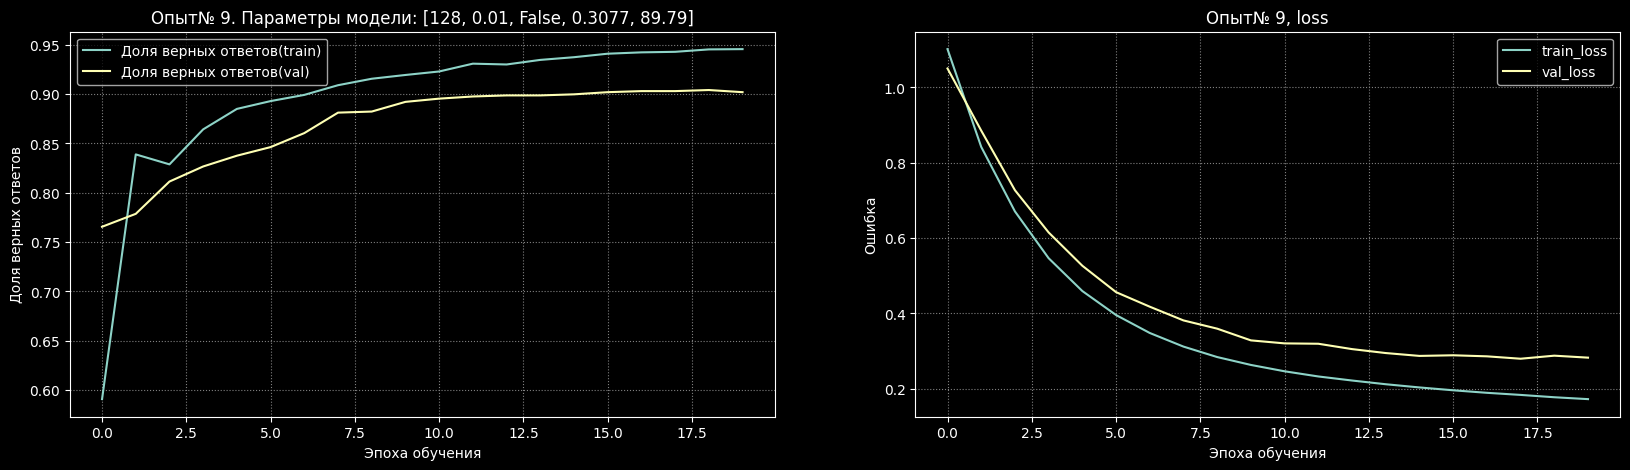

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2985
 Средняя точность на тестовой выборке: 89.97

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



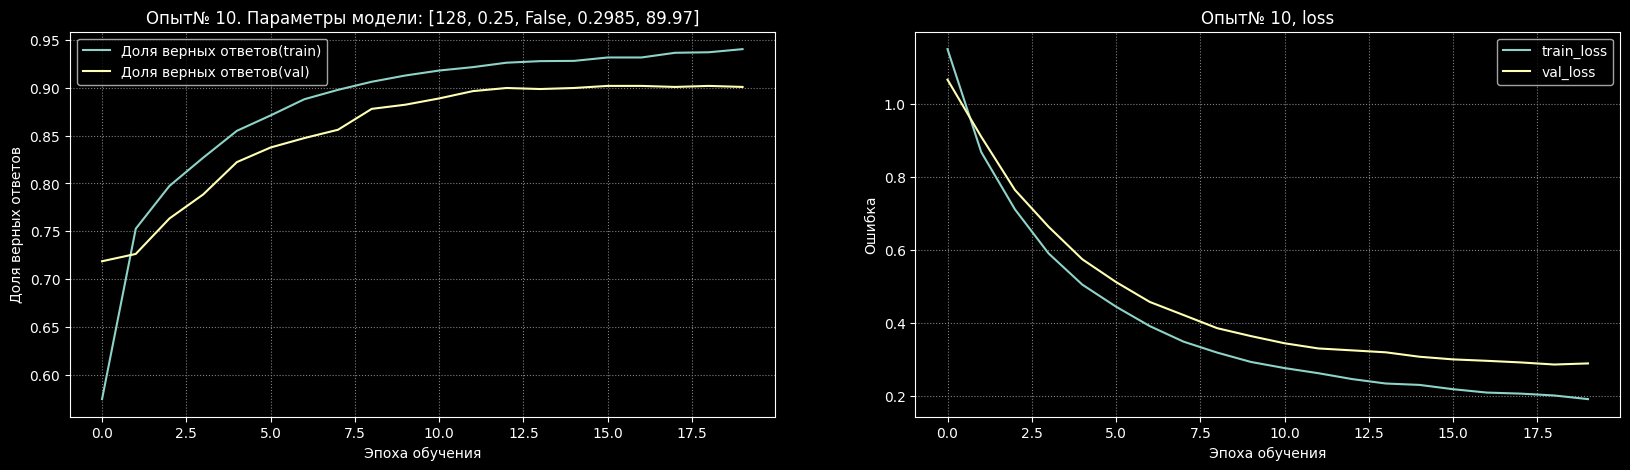

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2881
 Средняя точность на тестовой выборке: 90.14

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



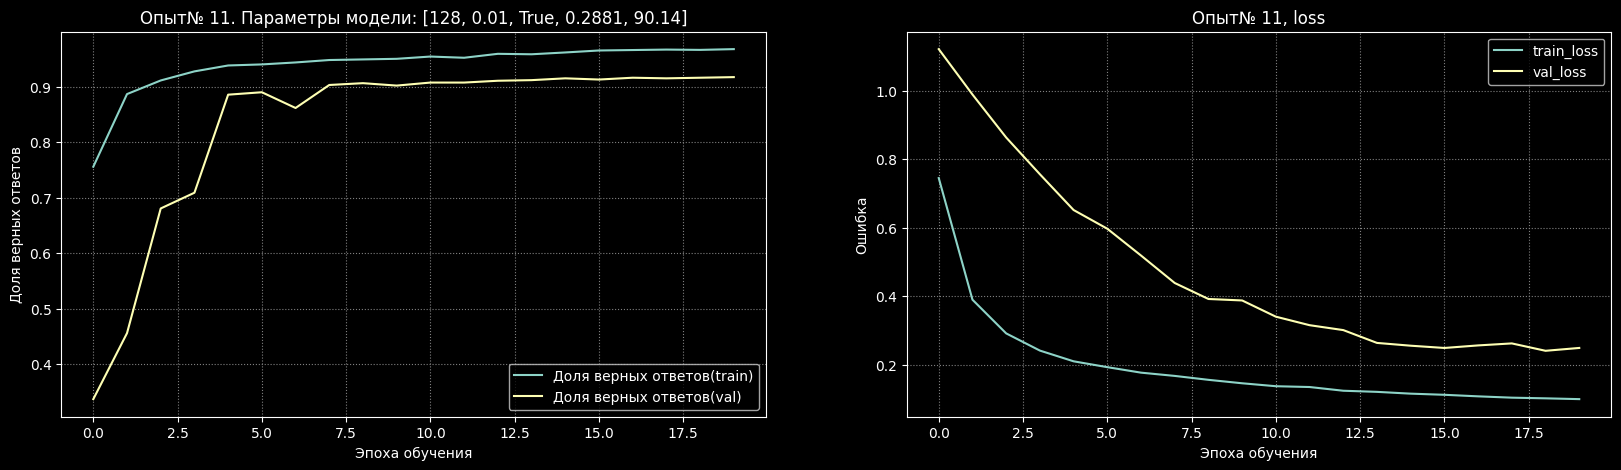

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2916
 Средняя точность на тестовой выборке: 90.4

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



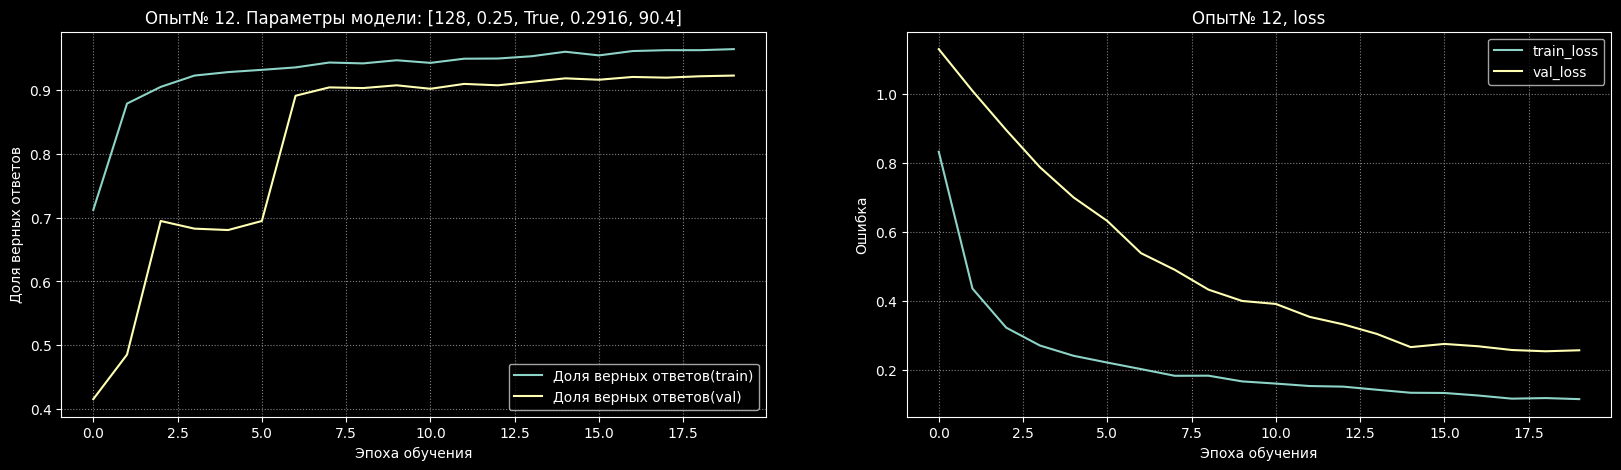

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.316
 Средняя точность на тестовой выборке: 89.09

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



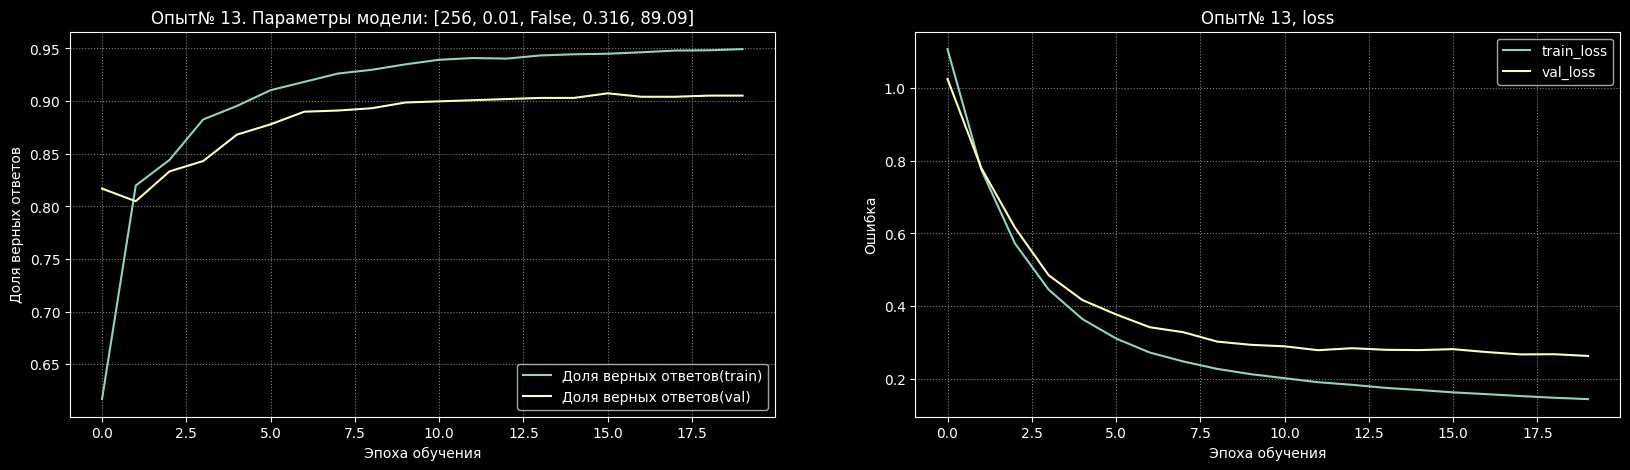

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.3032
 Средняя точность на тестовой выборке: 89.27000000000001

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



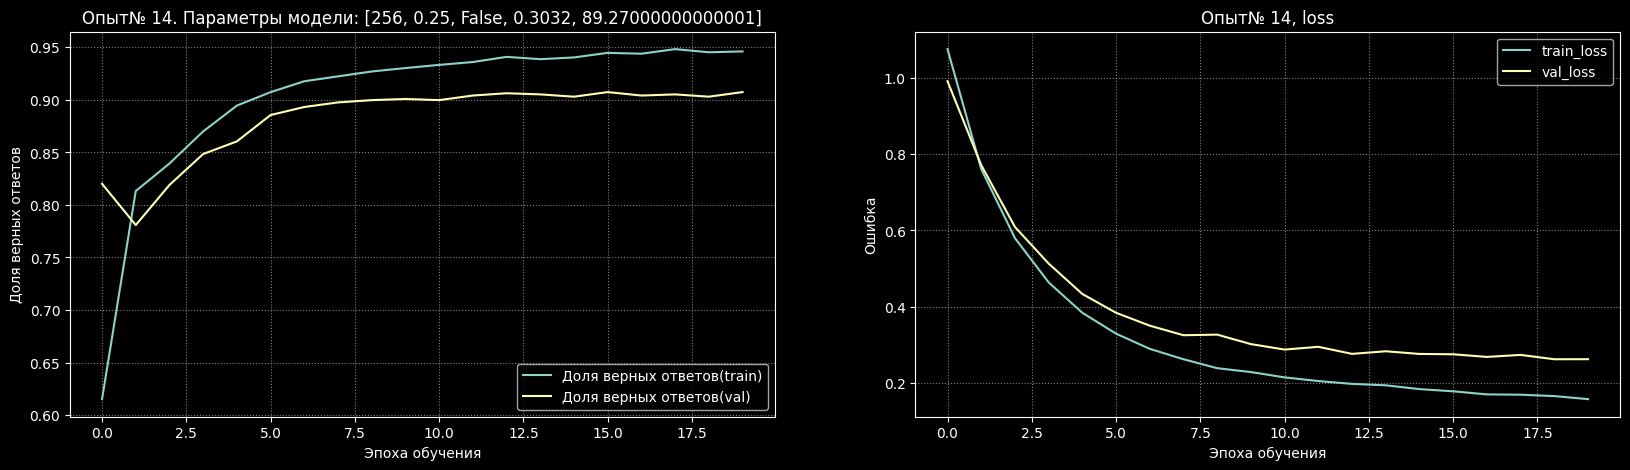

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.3025
 Средняя точность на тестовой выборке: 90.49000000000001

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



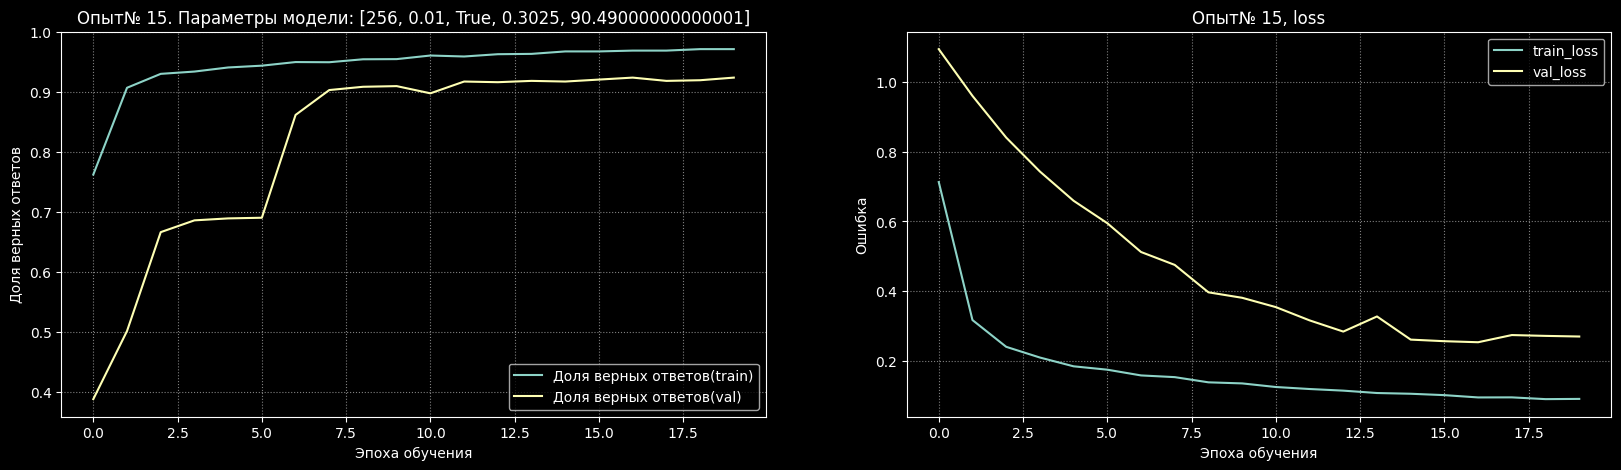

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2995
 Средняя точность на тестовой выборке: 90.75

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



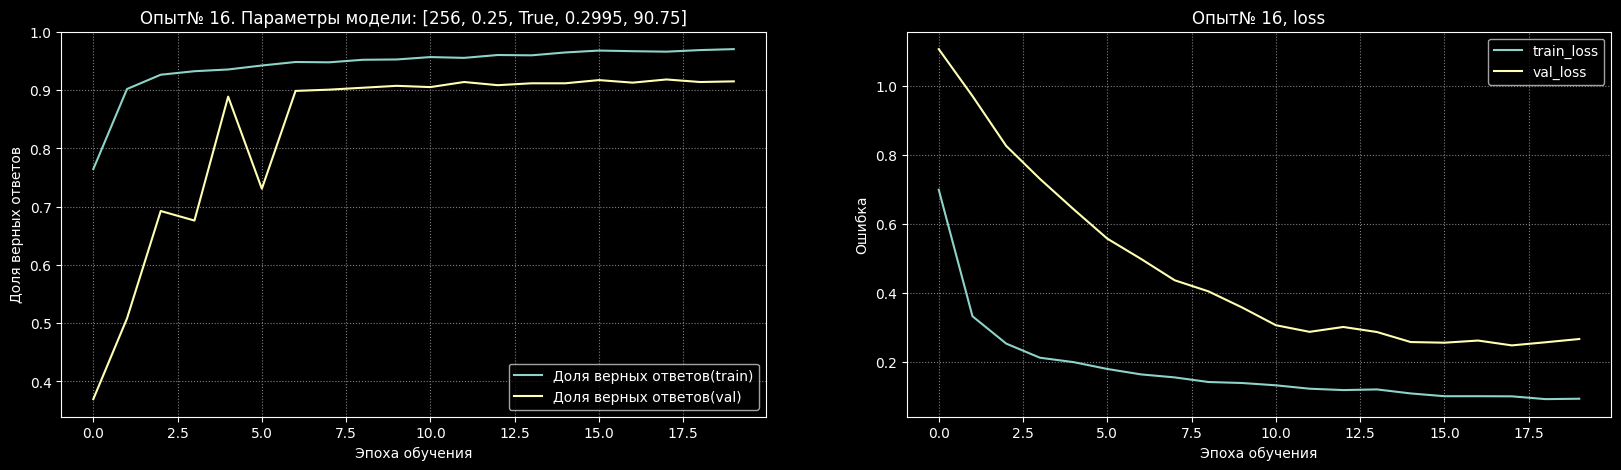

In [ ]:
for exp in range(len(val_loss)):
    graphic(loss[exp], acc[exp], val_loss[exp], val_acc[exp],
            par[exp][-1], par[exp][-2], exp, par[exp])


### Обучение модели с двумя слоями

In [ ]:
par, acc, loss, val_acc, val_loss = training(dense_param, drop_param, norm_param, 4)

Параметры модели: вх.нейр.= 32 ; откл.нейр.= 0.01 ; BatchNormalization= False
Epoch 1/20
29/29 [==============================] - 2s 15ms/step - loss: 1.2794 - accuracy: 0.5699 - val_loss: 1.1601 - val_accuracy: 0.8070
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.9398 - accuracy: 0.7625 - val_loss: 0.8890 - val_accuracy: 0.7612
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.6297 - accuracy: 0.8317 - val_loss: 0.6281 - val_accuracy: 0.8397
Epoch 4/20
29/29 [==============================] - 0s 5ms/step - loss: 0.4368 - accuracy: 0.8811 - val_loss: 0.4748 - val_accuracy: 0.8561
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3366 - accuracy: 0.9035 - val_loss: 0.4127 - val_accuracy: 0.8670
Epoch 6/20
29/29 [==============================] - 0s 5ms/step - loss: 0.2780 - accuracy: 0.9144 - val_loss: 0.3341 - val_accuracy: 0.8746
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: 0.2419 - 

#### Сводные результаты обучения

In [ ]:
print('2-й слой нейронов = Вх. слой * 4')
col = [' Число Нейронов ', ' Значение Dropout ',' BatchNormalization? ',' Loss тестовой ', ' Точность тестовой ']
df = pd.DataFrame(par, columns = col, index= np.arange(1, len(par)+1))
df

2-й слой нейронов = Вх. слой * 4


Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.2968                88.92  
2            0.2553                90.14  
3            0.2765                91.19  
4            0.2941                90.66  
5            0.2820                90.14  
6            0.2833                89.79  
7            0.2989                91.10  
8            0.2535                90.75  
9            0.2917                89.70  
10           0.2704                89.97  
11           0.3098                90.92  
12           0.3466                90.23  
13           0.3016                90.05  
14           0.2828                89.88  
15           0.3671                92.06  
16           0.3408                91.10

#### Графики обучения

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.2968
 Средняя точность на тестовой выборке: 88.92

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



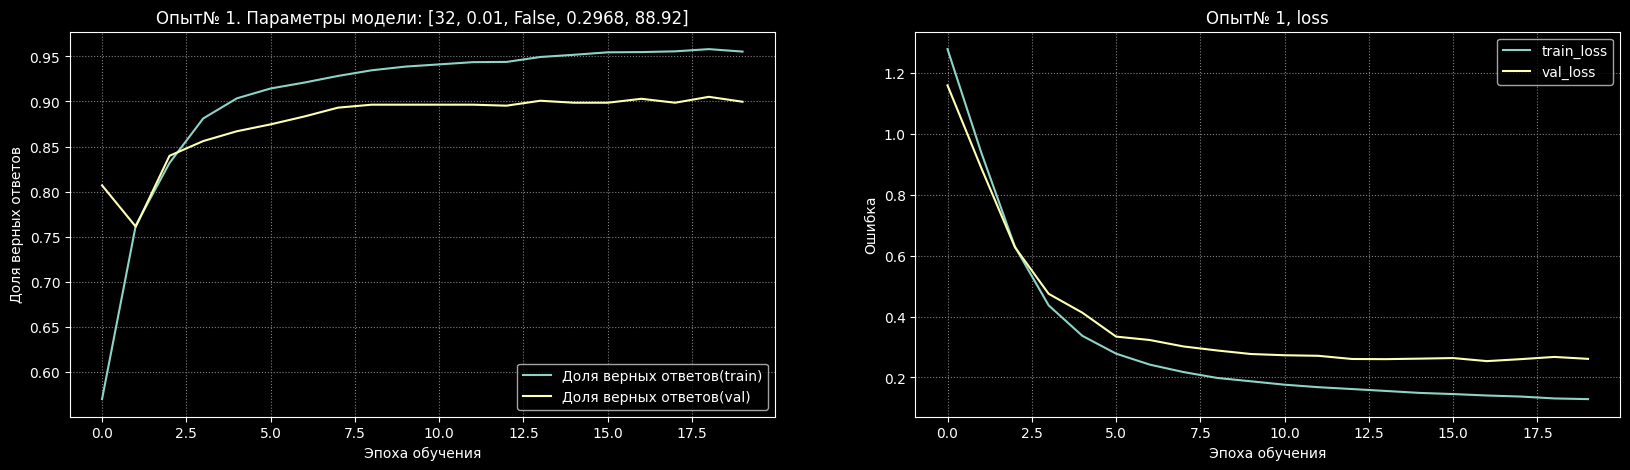

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2553
 Средняя точность на тестовой выборке: 90.14

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



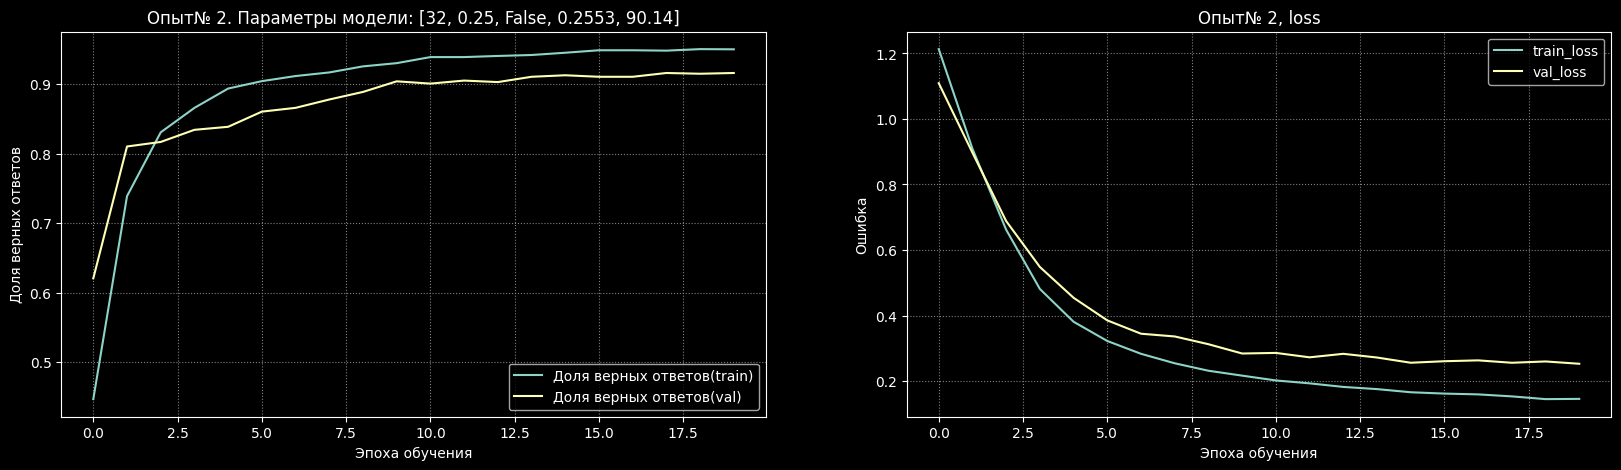

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2765
 Средняя точность на тестовой выборке: 91.19

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



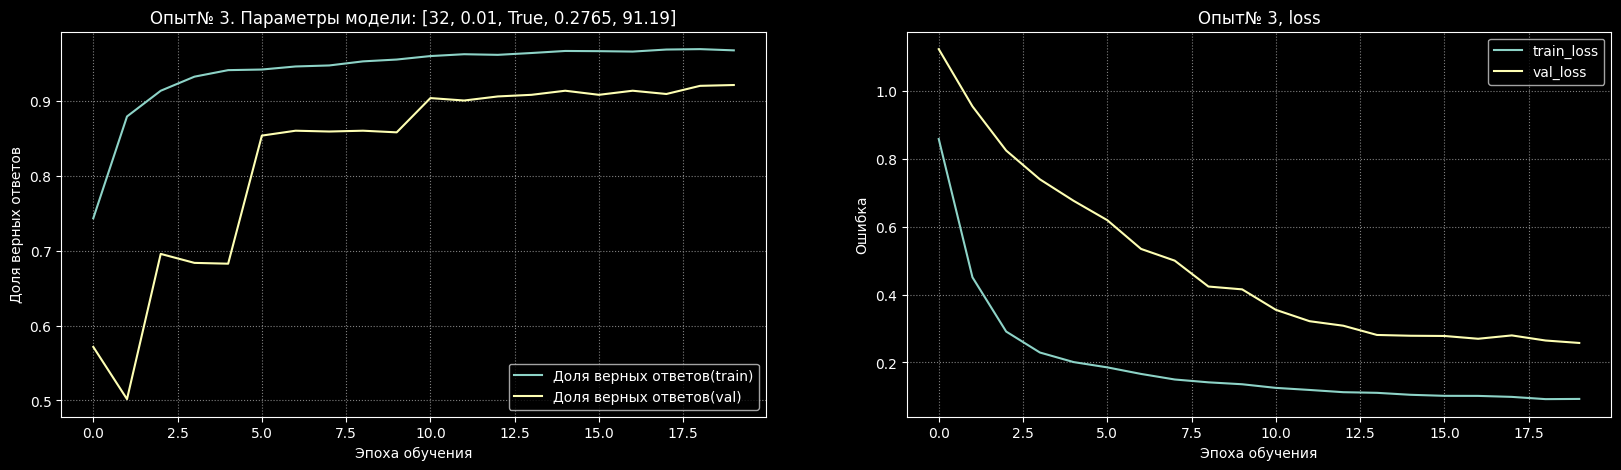

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2941
 Средняя точность на тестовой выборке: 90.66

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



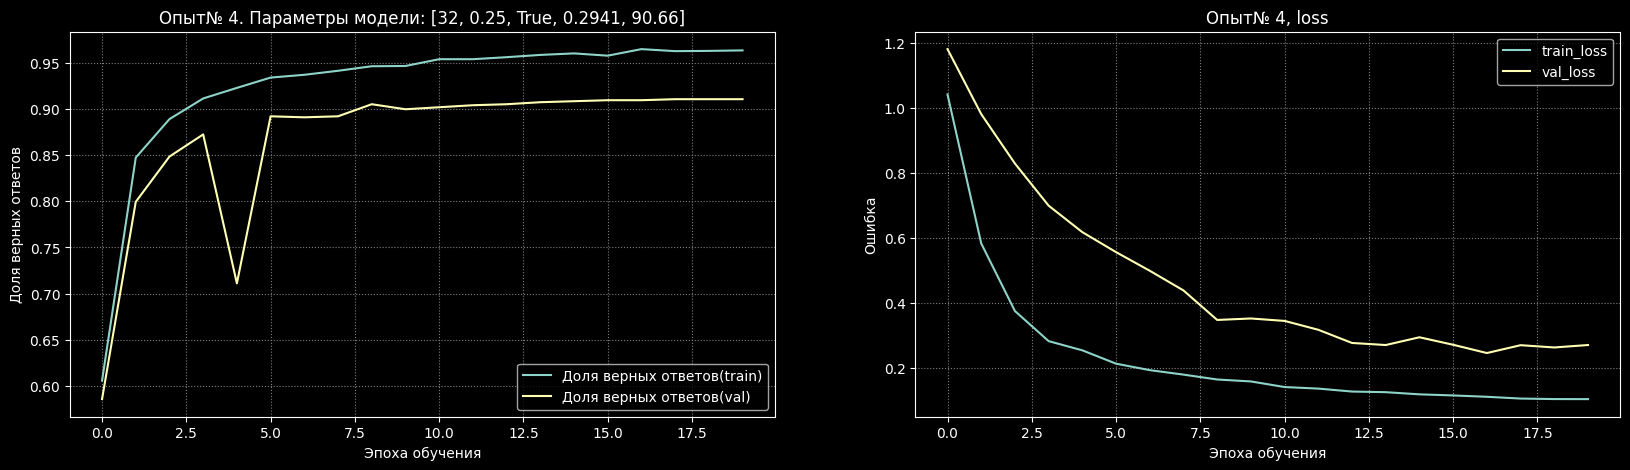

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.282
 Средняя точность на тестовой выборке: 90.14

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



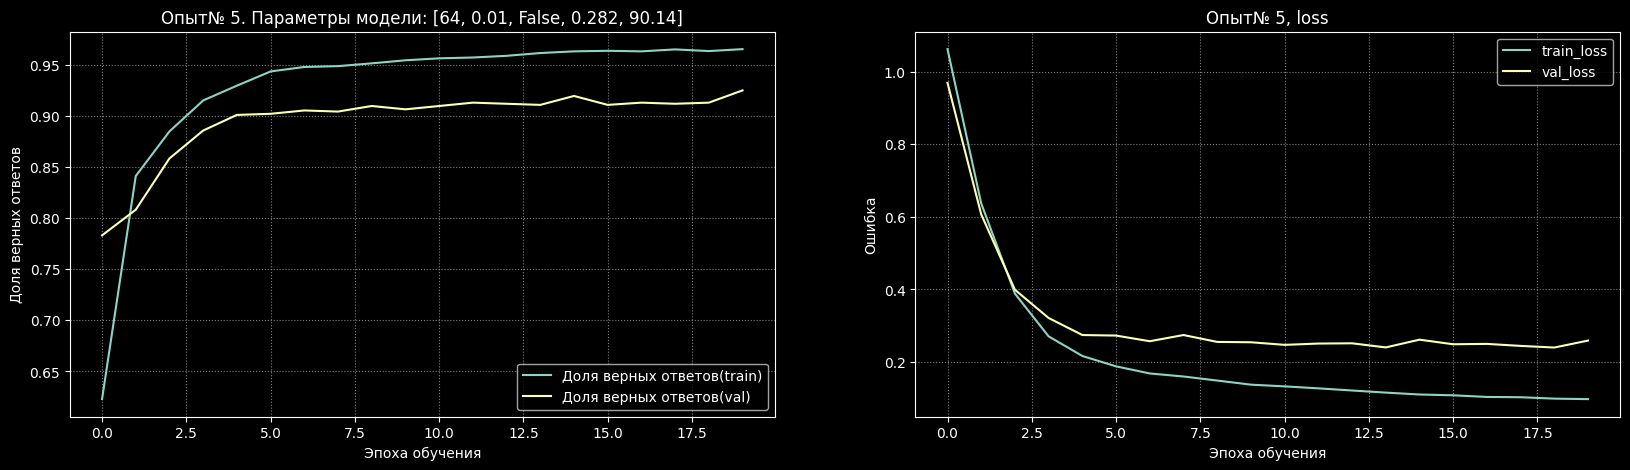

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2833
 Средняя точность на тестовой выборке: 89.79

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



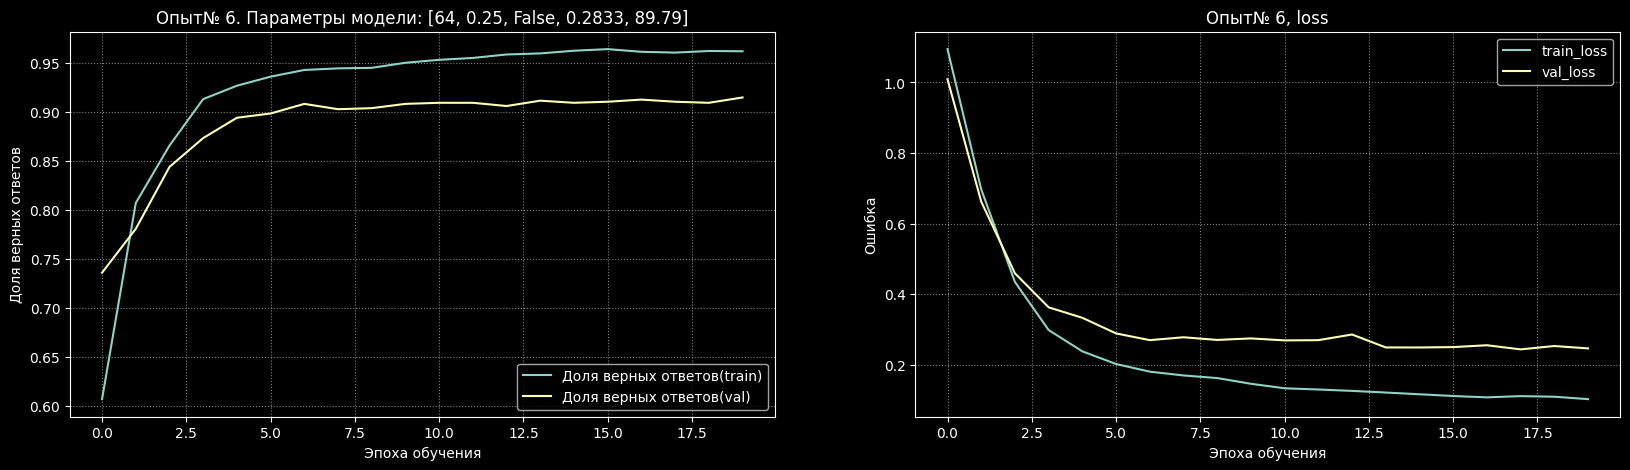

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2989
 Средняя точность на тестовой выборке: 91.10000000000001

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



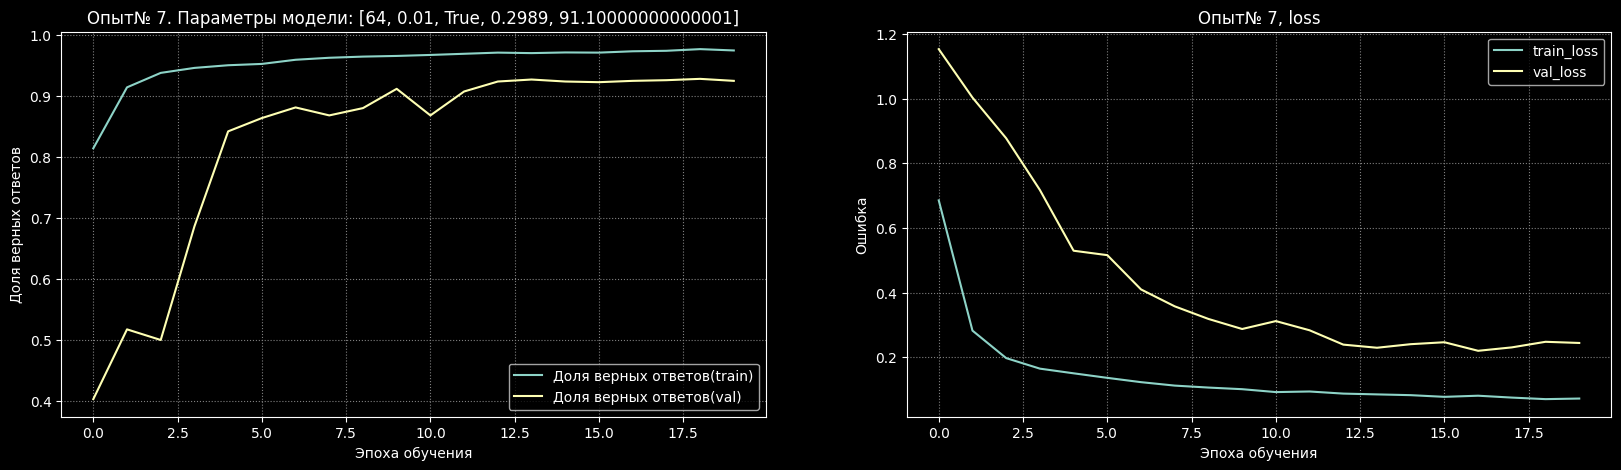

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2535
 Средняя точность на тестовой выборке: 90.75

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



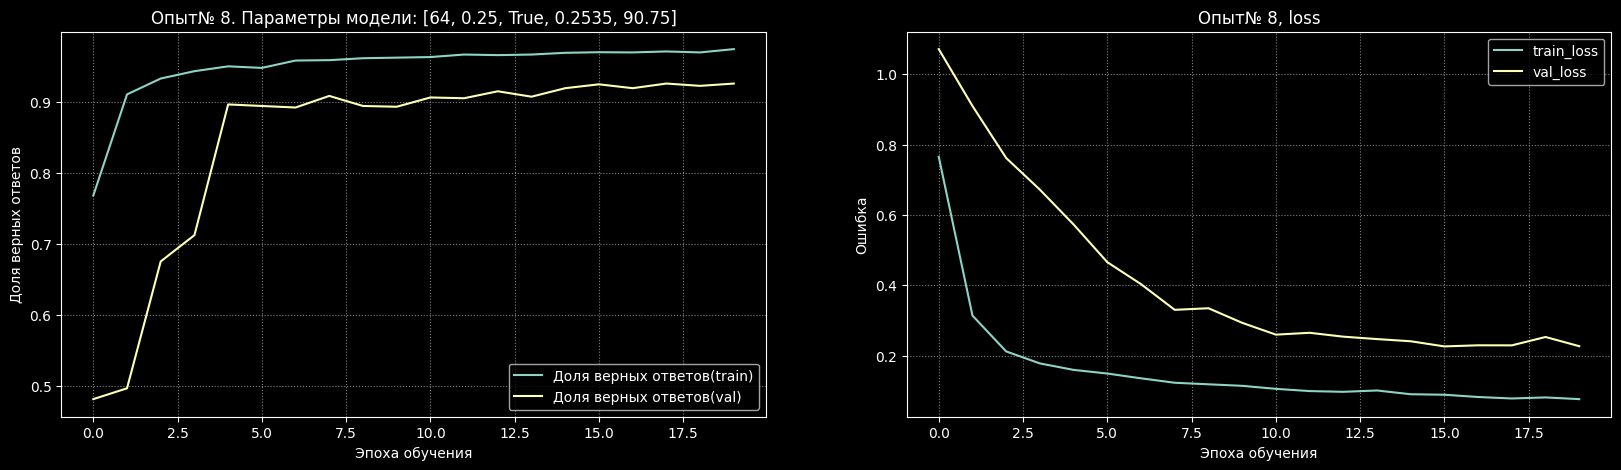

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.2917
 Средняя точность на тестовой выборке: 89.7

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



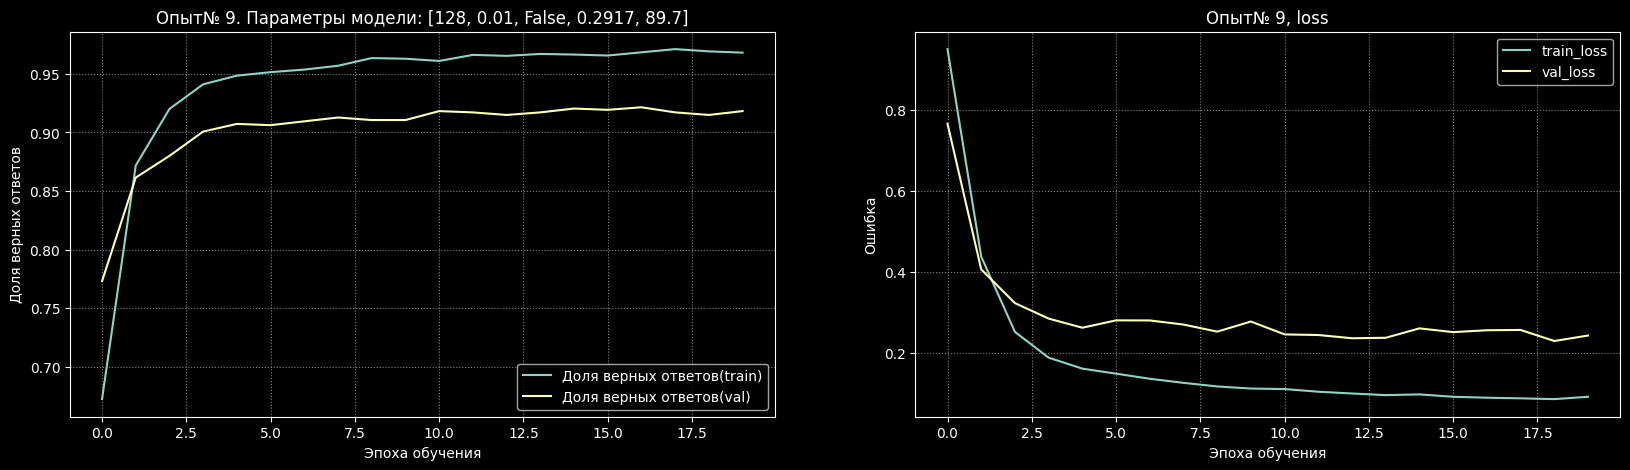

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2704
 Средняя точность на тестовой выборке: 89.97

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



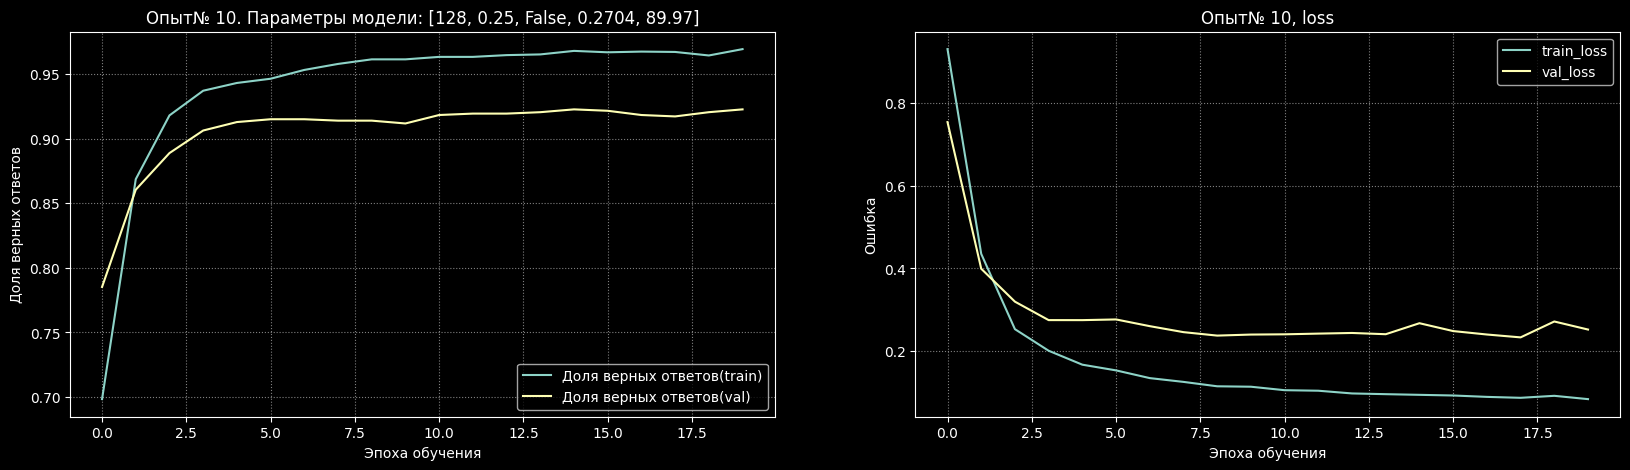

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.3098
 Средняя точность на тестовой выборке: 90.92

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



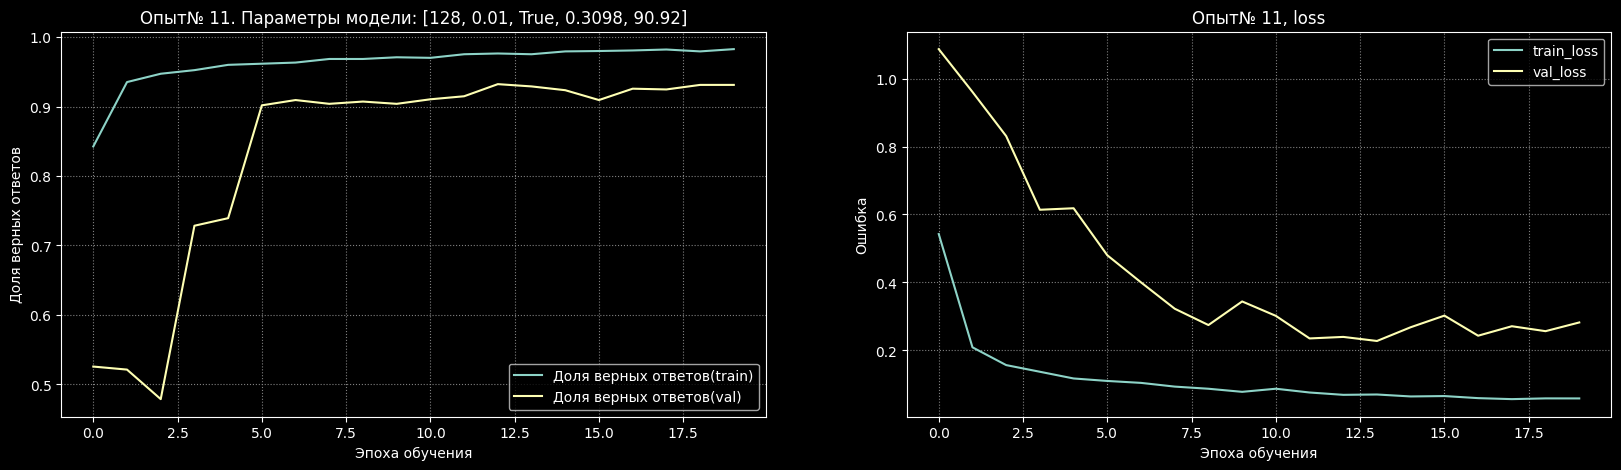

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.3466
 Средняя точность на тестовой выборке: 90.23

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



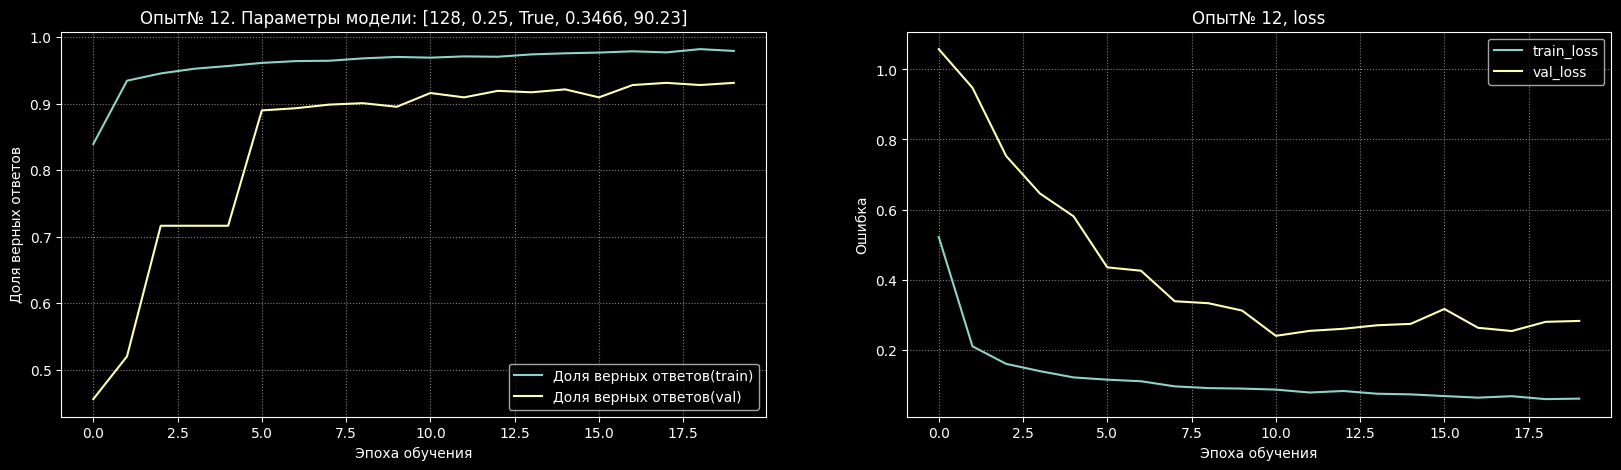

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.3016
 Средняя точность на тестовой выборке: 90.05

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



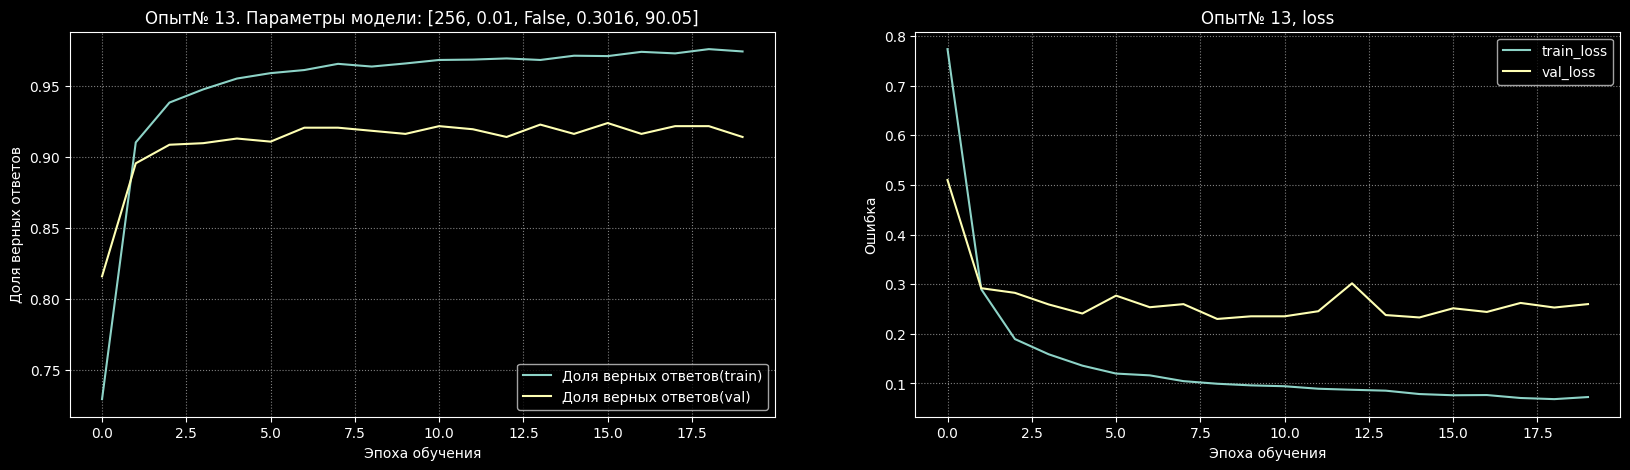

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2828
 Средняя точность на тестовой выборке: 89.88000000000001

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



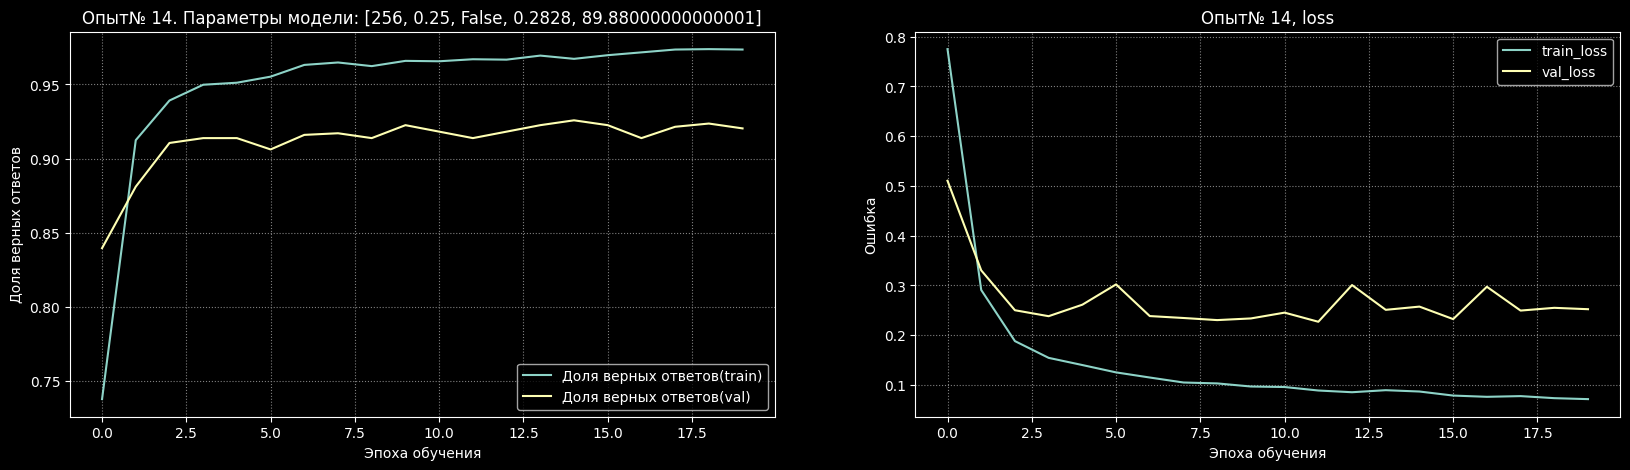

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.3671
 Средняя точность на тестовой выборке: 92.06

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



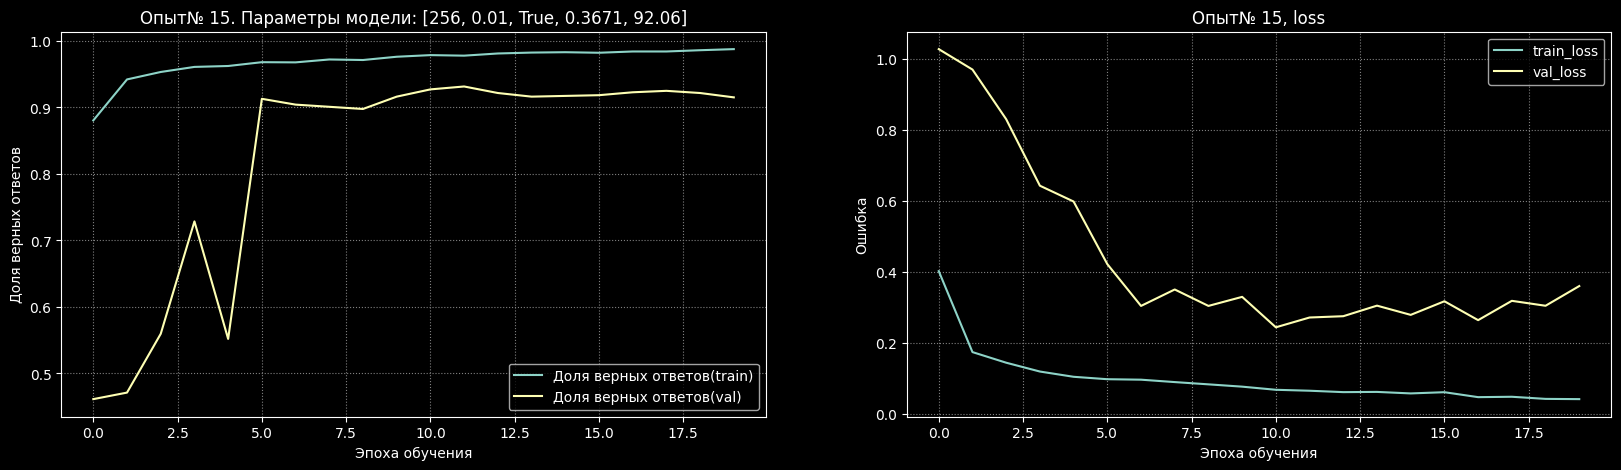

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.3408
 Средняя точность на тестовой выборке: 91.10000000000001

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



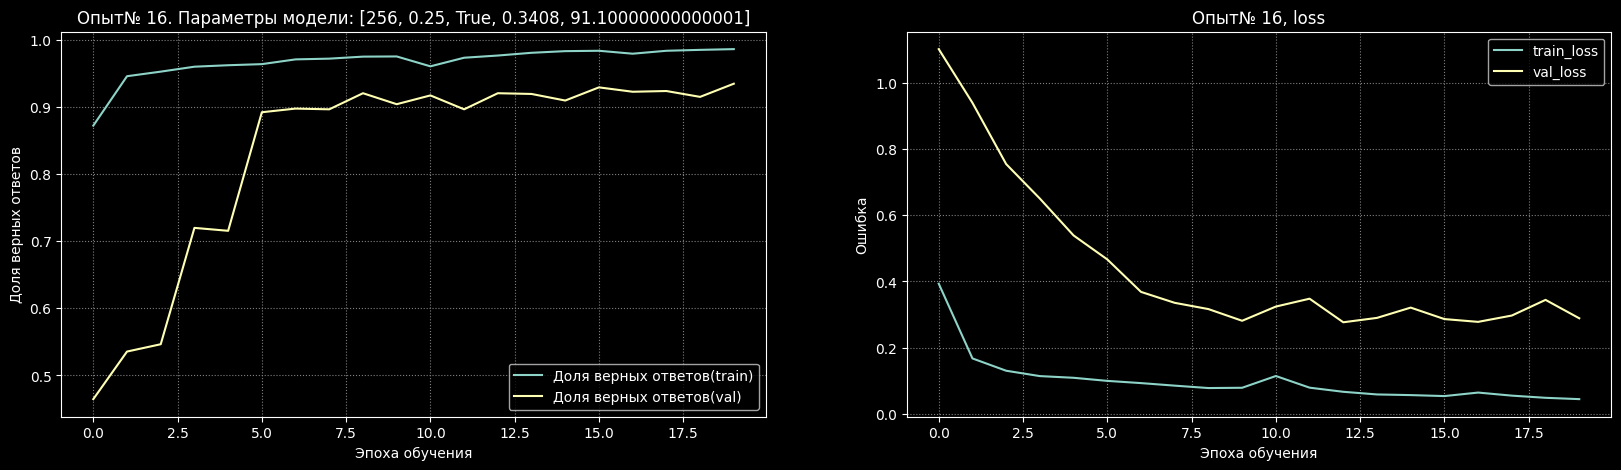

In [ ]:
for exp in range(len(val_loss)):
    graphic(loss[exp], acc[exp], val_loss[exp], val_acc[exp],
            par[exp][-1], par[exp][-2], exp, par[exp])

### Сводная таблица (1 слой)

Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.3377                89.35  
2            0.3437                88.05  
3            0.3210                89.70  
4            0.2984                90.49  
5            0.3279                89.70  
6            0.2964                90.31  
7            0.3039                89.97  
8            0.2989                90.75  
9            0.3077                89.79  
10           0.2985                89.97  
11           0.2881                90.14  
12           0.2916                90.40  
13           0.3160                89.09  
14           0.3032                89.27  
15           0.3025                90.49  
16           0.2995                90.75

### Сводная таблица (2 слоя)

2-й слой нейронов = Вх. слой * 4


Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.2968                88.92  
2            0.2553                90.14  
3            0.2765                91.19  
4            0.2941                90.66  
5            0.2820                90.14  
6            0.2833                89.79  
7            0.2989                91.10  
8            0.2535                90.75  
9            0.2917                89.70  
10           0.2704                89.97  
11           0.3098                90.92  
12           0.3466                90.23  
13           0.3016                90.05  
14           0.2828                89.88  
15           0.3671                92.06  
16           0.3408                91.10